This notebook applies a logistic regression model to the data set, including transformations, segmentations, and interactions as discovered and created in the exploratory R script <a href="https://github.com/dongmeic/SDM/blob/master/R/models/logisticModEDA.R.ipynb">here</a>.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import model_utils as util

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [30]:
DATA_PATH =  '../../data/cluster/year/'
os.listdir(DATA_PATH)

['tensor2000.pkl.bz2',
 'tensor2001.pkl.bz2',
 'tensor2002.pkl.bz2',
 'tensor2003.pkl.bz2',
 'tensor2004.pkl.bz2',
 'tensor2005.pkl.bz2',
 'tensor2006.pkl.bz2',
 'tensor2007.pkl.bz2',
 'tensor2008.pkl.bz2',
 'tensor2009.pkl.bz2',
 'tensor2010.pkl.bz2',
 'tensor2011.pkl.bz2',
 'tensor2012.pkl.bz2',
 'tensor2013.pkl.bz2',
 'tensor2014.pkl.bz2',
 'weights.bestNN.hdf5',
 'X_big_test.csv',
 'X_big_train.csv',
 'X_big_valid.csv',
 'X_test.csv',
 'X_train.csv',
 'X_valid.csv',
 'y_big_test.csv',
 'y_big_train.csv',
 'y_big_valid.csv',
 'y_matrix2000.pkl.bz2',
 'y_matrix2001.pkl.bz2',
 'y_matrix2002.pkl.bz2',
 'y_matrix2003.pkl.bz2',
 'y_matrix2004.pkl.bz2',
 'y_matrix2005.pkl.bz2',
 'y_matrix2006.pkl.bz2',
 'y_matrix2007.pkl.bz2',
 'y_matrix2008.pkl.bz2',
 'y_matrix2009.pkl.bz2',
 'y_matrix2010.pkl.bz2',
 'y_matrix2011.pkl.bz2',
 'y_matrix2012.pkl.bz2',
 'y_matrix2013.pkl.bz2',
 'y_matrix2014.pkl.bz2',
 'y_test.csv',
 'y_train.csv',
 'y_valid.csv']

In [31]:
def load_data(data_dir):
    X_train = pd.read_csv(data_dir + 'X_big_train.csv')
    print('X_train:', X_train.shape)
    X_valid = pd.read_csv(data_dir + 'X_big_valid.csv')
    print('X_valid:', X_valid.shape)
    X_test  = pd.read_csv(data_dir + 'X_big_test.csv')
    print('X_test:',  X_test.shape)
    y_train = pd.read_csv(data_dir + 'y_big_train.csv')
    print('y_train:', y_train.shape)
    y_valid = pd.read_csv(data_dir + 'y_big_valid.csv')
    print('y_valid:', y_valid.shape)
    y_test  = pd.read_csv(data_dir + 'y_big_test.csv')
    print('y_test:',  y_test.shape)
    
    return [[X_train, y_train], [X_valid, y_valid], [X_test, y_test]]

In [32]:
[[X_train, y_train], 
 [X_valid, y_valid], 
 [X_test, y_test]] = load_data(DATA_PATH)

X_train: (529623, 428)
X_valid: (176541, 428)
X_test: (176541, 428)
y_train: (529623, 1)
y_valid: (176541, 1)
y_test: (176541, 1)


In [33]:
y_train.head()

,beetle
0,0
1,0
2,0
3,0
4,0


In [34]:
X_train.head()

,year,meanTemp_Annual,meanTemp_AprAug,meanTemp_Aug,meanMinTemp_DecFeb,meanMinTemp_Oct,meanMinTemp_Jan,meanMinTemp_Mar,meanMaxTemp_Aug,precip_meanAnnual,...,precip_OctSep.elev_etopo1_L111,precip_OctSep.lat_L45,precip_OctSep.precip_growingSeason_L35,precip_OctSep.precipPrevious_OctSep_L1065,precip_OctSep.precip_meanAnnual_L1049,precip_OctSep.precip_OctSep_L10112864,meanMaxTemp_Aug.precip_OctSep,meanTemp_AprAug.precip_OctSep,precip_OctSep.varPrecip_growingSeason,meanTemp_Aug.precip_OctSep
0,2006,3.990634,1.605879,1.290749,69.133768,0.720433,127.207708,1250.563817,4.935820,1.044079,...,1.011283,1.011283,1.011283,1.011283,1.011283,1.011283,4.991511,1.623998,1.359425,1.305313
1,2006,3.992621,1.606685,1.290793,69.219433,0.720437,127.429912,1260.014689,4.939409,1.043837,...,1.011283,1.011283,1.011283,1.011283,1.011283,1.011283,4.995140,1.624813,1.356691,1.305357
2,2006,3.996872,1.609031,1.290969,69.081661,0.720437,127.072590,1258.160544,4.963157,1.043672,...,1.011283,1.011283,1.011283,1.011283,1.011283,1.011283,5.019156,1.627185,1.353328,1.305535
3,2006,3.985463,1.605739,1.290857,68.045596,0.720410,124.392642,1180.705122,4.965677,1.044720,...,1.011284,1.011284,1.011284,1.011284,1.011284,1.011284,5.021708,1.623858,1.336549,1.305422
4,2006,3.987666,1.607431,1.290990,67.750966,0.720408,123.632866,1172.168976,4.985482,1.044705,...,1.011283,1.011283,1.011283,1.011283,1.011283,1.011283,5.041735,1.625569,1.332730,1.305557


In [35]:
segmented = [field for field in (list(X_train)) if 'L' in field]
interactions = [field for field in list(X_train) if '.' in field]
both = list(set(segmented) | set(interactions))
print(len(segmented), len(interactions), len(both))

277 388 405


In [36]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test,  'y_test')

Percent presence in y_train: 17.26%
Percent presence in y_valid: 13.92%
Percent presence in y_test: 12.64%


In [37]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 17.26)
print('  valid:', 100 - 13.92)
print('  test: ', 100 - 12.64)

Baseline accuracy if predicting "absent" for all cells:
  train: 82.74
  valid: 86.08
  test:  87.36


In [38]:
is_finite = np.isfinite(X_valid).all()

In [39]:
have_nans = list(is_finite[is_finite == False].index)
#have_nans

In [40]:
X_train, y_train = util.drop_nans(
    X_train, y_train, 'varPrecip_growingSeason')
X_valid, y_valid = util.drop_nans(
    X_valid, y_valid, 'varPrecip_growingSeason')
X_test,  y_test  = util.drop_nans(
    X_test,  y_test,  'varPrecip_growingSeason')

(526849, 428) (526849, 1)
(176146, 428) (176146, 1)
(175416, 428) (175416, 1)


In [41]:
is_finite = np.isfinite(X_valid).all()
have_nans = list(is_finite[is_finite == False].index)
have_nans

[]

In [42]:
def drop_fields(fields, Xs):
    X_train, X_valid, X_test = Xs
    X_train = X_train.drop(fields, axis=1)
    X_valid = X_valid.drop(fields, axis=1)
    X_test  = X_test.drop(fields,  axis=1)
    return X_train, X_valid, X_test

In [43]:
# Select data set here
Xs = X_train, X_valid, X_test
#X_train, X_valid, X_test = drop_fields(segmented, Xs)
#X_train, X_valid, X_test = drop_fields(interactions, Xs)
X_train, X_valid, X_test = drop_fields(both, Xs)

In [44]:
full_test = X_test.copy()
full_test['beetle'] = y_test['beetle']

In [45]:
# Drop 'studyArea' from predictors (all 1 in the reduced data) and 'x' and
# 'y' (perfectly correlated with 'lon' and 'lat')
X_train = X_train.drop(['x', 'y'], axis=1)
X_valid = X_valid.drop(['x', 'y'], axis=1)
X_test  = X_test.drop(['x', 'y'],  axis=1)

In [46]:
# Normalize data to make gradient descent more efficient
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [47]:
y_train = y_train['beetle'].values.reshape(-1)
y_valid = y_valid['beetle'].values.reshape(-1)
y_test  = y_test['beetle'].values.reshape(-1)

# Logistic Regression 
#### With L1 (_Lasso Regression_) or L2 (_Ridge Regression_ ) Regularization
This model will be considered the baseline for logistic regression models as it uses just the raw predictors.  After some EDA, various transformations and interaction terms will also be considered in order to improve the model.

In [48]:
# Find optimal regularization via best validation-set accuracy
l1_mods = []
l2_mods = []
Cs = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

t0 = time.time()
for C in Cs:
    print('Testing C =', C, end='; ')
    for penalty in ['l1', 'l2']:
        print('(%s)' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty)
        logistic_clf.fit(X_test, y_test)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.0001; (l1) Elapsed time: 0.04 minutes
(l2) Elapsed time: 0.05 minutes
Testing C = 0.0005; (l1) Elapsed time: 0.42 minutes
(l2) Elapsed time: 0.43 minutes
Testing C = 0.001; (l1) Elapsed time: 0.64 minutes
(l2) Elapsed time: 0.66 minutes
Testing C = 0.005; (l1) Elapsed time: 1.04 minutes
(l2) Elapsed time: 1.05 minutes
Testing C = 0.01; (l1) Elapsed time: 1.25 minutes
(l2) Elapsed time: 1.26 minutes
Testing C = 0.05; (l1) Elapsed time: 2.09 minutes
(l2) Elapsed time: 2.10 minutes
Testing C = 0.1; (l1) Elapsed time: 2.60 minutes
(l2) Elapsed time: 2.61 minutes
Testing C = 0.5; (l1) Elapsed time: 2.81 minutes
(l2) Elapsed time: 2.82 minutes
Testing C = 1; (l1) Elapsed time: 2.93 minutes
(l2) Elapsed time: 2.94 minutes


[0.86051343771643973, 0.86051343771643973, 0.86051343771643973, 0.86051343771643973, 0.86051343771643973, 0.86051343771643973, 0.86051343771643973, 0.86051343771643973, 0.86051343771643973]


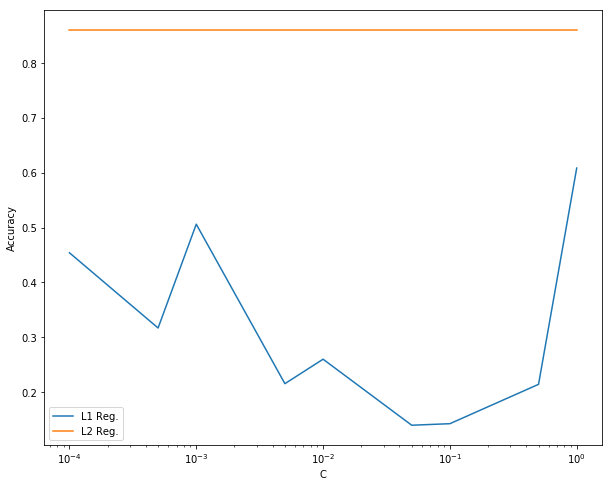

In [49]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');
print(l2_mods)

In [50]:
logistic_clf = LogisticRegression(C=1, penalty='l2')
logistic_clf.fit(X_test, y_test)
preds = logistic_clf.predict(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.87278811510922605

In [51]:
print(preds[:10])
print(y_test[:10])

[1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [52]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

In [53]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])

#THRESHOLD = 0.5
#preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
#print(preds[:5])

#best_threshold = threshold_plot(pred_ps, y_test);
#print(best_threshold)

[[ 0.5         0.5       ]
 [ 0.54210458  0.45789542]
 [ 0.53946572  0.46053428]
 [ 0.57485472  0.42514528]
 [ 0.573933    0.426067  ]]


In [54]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	0		22314
        0	1		153101
Accuracy:  0.872788115109
Precision: 0.0
Recall:    0.0
F1:        nan


/Users/dsp/dongmei/sdm/python/models/model_utils.py:112: RuntimeWarning: invalid value encountered in double_scalars
  F1        = 2 * precision * recall / (precision + recall)


AUC:       0.300945843031


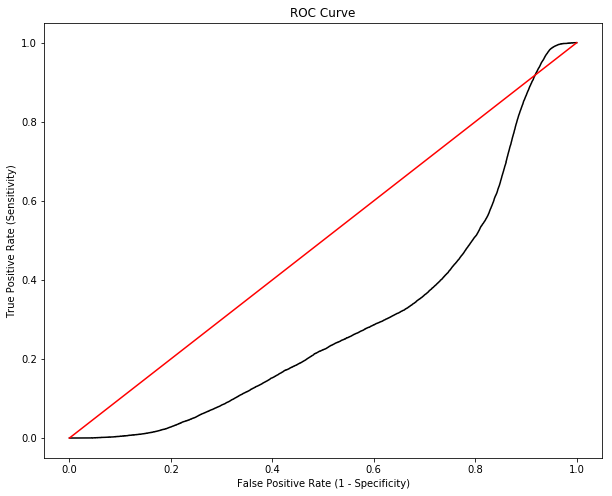

In [55]:
auc_metrics = util.get_auc(y_test, pred_ps)
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

* **Full model**
```
    C=0.01, penalty='l2'

    Confusion Matrix:
           Predicted:
                  1		  0
    Actual: 1	  3186	  19128
            0	  3487	  149615

    Accuracy:  0.871077894833
    Precision: 0.477446425895
    Recall:    0.14278031729
    F1:        0.219822679132
    AUC:       0.847796955454
```

* **No Segmented Data**
```
    C=1, penalty='l2'
    Confusion Matrix:
             Predicted:
                1		0
    Actual: 1	2898		19416
            0	3140		149962
    Accuracy:  0.871414238154
    Precision: 0.479960251739
    Recall:    0.129873621941
    F1:        0.204430022573  
    AUC:       0.833799160281 
```

* **No Interactions and No Both**
```
    Confusion Matrix:
             Predicted:
                1		0
    Actual: 1	0		22314
            0	1		153101
    Accuracy:  0.872788115109
    Precision: 0.0
    Recall:    0.0
    F1:        nan
    AUC:       0.300945843031
```